<h1>Generative Deep Learning 2021/2022</h1>
<h2>Lab Session 2: Building Neural Networks with TensorFlow</h2>
<h3>Danilo Comminiello</h3>
<h3>June 6, 2022</h3>

### Table of Contents
1. [What is TensorFlow](#tfi)<br>
2. [First Steps with TensorFlow](#ins)<br>
3. [Creating a TensorFlow Dataset](#dat#)<br>
4. [TensorFlow Dataset Library](#tfds)<br>
5. [Building a Multilayer Perceptron for Classifying Iris Flowers](#mlp)<br>
6. [Resources on TensorFlow](#res)<br>
7. [References](#ref)<br>

### 1. What is TensorFlow <a name="tfi"/>
In this lab session, we introduce [**TensorFlow**](https://www.tensorflow.org/), one of the most popular deep learning libraries currently available, which allows us implement neural networks (NNs) much more efficiently than any of our previous NumPy implementations.

**TensorFlow** can speed up our machine learning tasks significantly. TensorFlow is a scalable and multiplatform programming interface for implementing and running machine learning algorithms, including convenience wrappers for deep learning. TensorFlow was developed by the researchers and engineers from the Google Brain team.

To improve the performance of training machine learning models, TensorFlow allows execution on both CPUs and GPUs. However, its greatest performance capabilities can be discovered when **using GPUs**. TensorFlow supports CUDA enabled GPUs officially. TensorFlow currently supports frontend interfaces for a number of programming languages.

TensorFlow is built around a **computation graph** composed of a set of nodes. Each node represents an operation that may have zero or more input or output. A tensor is created as a symbolic handle to refer to the input and output of these operations.

The TensorFlow library recently received a major overhaul with its **2.0 version**, which makes building and training NN models a lot simpler. While TensorFlow 2.0 still supports static computation graphs, it now uses dynamic computation graphs, which allows for more flexibility.

### 2. First Steps with TensorFlow <a name="ins"/>
We will take our first steps in using the **low-level TensorFlow API**.

[TensorFlow installation](https://www.tensorflow.org/install/) can be done just using Python's pip installer.

In [1]:
! pip freeze

absl-py==0.12.0
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.10.0
anaconda-project==0.8.2
anyio @ file:///C:/ci/anyio_1617783473211/work/dist
argon2-cffi @ file:///C:/ci/argon2-cffi_1613038019788/work
asn1crypto==0.24.0
astor==0.7.1
astroid==2.1.0
astropy==3.1
astunparse==1.6.3
async-generator==1.10
atomicwrites==1.2.1
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
audioread==2.1.7
Babel @ file:///tmp/build/80754af9/babel_1607110387436/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
backports.functools-lru-cache @ file:///tmp/build/80754af9/backports.functools_lru_cache_1618170165463/work
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile @ file:///home/linux1/recipes/ci/backports.tempfile_1610991236607/work
backports.weakref==1.0.post1
beautifulsoup4 @ file:///home/linux1/recipes/ci/beautifulsoup4_1610988766420/work
bitarray==0.8.3
bkcharts==0.2
blaze==0.11.3
bleach @ file:///tmp/build/80754af9/bleach_

Install the latest stable version, which is 2.8.0 at this time.

Uncomment the next lines if you need to install or upgrade TensorFlow. You can also use the Prompt.

In [2]:
# ! pip uninstall tensorflow
# ! pip install --upgrade tensorflow

In case you want to use GPUs (recommended), you need a compatible NVIDIA graphics card, along with the CUDA Toolkit and the NVIDIA cuDNN library to be installed. If your machine satisfies these requirements, you can install [TensorFlow with GPU support](https://www.tensorflow.org/install/gpu), as follows:

In [3]:
# Uncomment the next line to use GPUs
#pip install tensorflow-gpu

In [4]:
# Import TensorFlow and check its version
import tensorflow as tf
print('TensorFlow version:', tf.__version__)
import numpy as np

np.set_printoptions(precision=3)

TensorFlow version: 2.8.0


Now, let's consider a few different ways of **creating tensors**, and then see some of their properties and how to manipulate them. Firstly, we can simply create a tensor from a list or a NumPy array using the `tf.convert_to_tensor` function.

In [5]:
a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]

t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [6]:
tf.is_tensor(a), tf.is_tensor(t_a)

(False, True)

This resulted in tensors `t_a` and `t_b`, with their properties, `shape=(3,)` and `dtype=int32`, adopted from their source. Similar to NumPy arrays, we can further see these properties.To get access to the values that a tensor refers to, we can simply call the `.numpy()` method on a tensor.

In [7]:
t_ones = tf.ones((2, 3))

t_ones.shape

TensorShape([2, 3])

In [8]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

Creating a tensor of constant values can be done as follows:

In [9]:
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)

print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


The `tf.cast()` function can be used to change the data type of a tensor to a desired type.

In [10]:
t_a_new = tf.cast(t_a, tf.int64)

print(t_a_new.dtype)

<dtype: 'int64'>


Transposing a tensor:

In [11]:
t = tf.random.uniform(shape=(3, 5))

t_tr = tf.transpose(t)
print(t.shape, ' --> ', t_tr.shape)

(3, 5)  -->  (5, 3)


Reshaping a tensor:

In [12]:
t = tf.zeros((30,))

t_reshape = tf.reshape(t, shape=(5, 6))

print(t_reshape.shape)

(5, 6)


Removing the unnecessary dimensions (i.e., dimensions of size 1):

In [13]:
t = tf.zeros((1, 2, 1, 4, 1))

t_sqz = tf.squeeze(t, axis=(2, 4))

print(t.shape, ' --> ', t_sqz.shape)

(1, 2, 1, 4, 1)  -->  (1, 2, 4)


We can instantiate **random tensors**, e.g., one with uniform distribution in the range [–1, 1) and the other with a standard normal distribution.

In [14]:
tf.random.set_seed(1)

t1 = tf.random.uniform(shape=(5, 2), 
                       minval=-1.0,
                       maxval=1.0)

t2 = tf.random.normal(shape=(5, 2), 
                      mean=0.0,
                      stddev=1.0)


**Element-wise product** of `t1` and `t2`:

In [15]:
t3 = tf.multiply(t1, t2).numpy()
print(t3)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


Compute the **mean** along a certain axis. Similarly, we can compute sum and standard deviation.

In [16]:
t4 = tf.math.reduce_mean(t1, axis=0)

print(t4)

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


**Matrix-matrix product** between `t1` and `t2`:

In [17]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True)

print(t5.numpy())

[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]]


In [18]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True)

print(t6.numpy())

[[-1.711  0.302]
 [ 0.371 -1.049]]


The `tf.norm()` function is useful for computing the $\ell_p$ **norm of a tensor**. For example, we can calculate the $\ell_2$ norm of `t1` and verify the result as follows:

In [19]:
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy()

print(norm_t1)

[1.046 0.293 0.504 0.96  0.383]


In [20]:
np.sqrt(np.sum(np.square(t1), axis=1))

array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)

Now we introduce TensorFlow operations for **splitting a tensor** into multiple tensors, or the reverse: stacking and concatenating multiple tensors into a single one.

Providing the number of splits (must be divisible):

In [21]:
tf.random.set_seed(1)

t = tf.random.uniform((6,))

print(t.numpy())

t_splits = tf.split(t, 3)

[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292 0.643]


[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

Providing the sizes of different splits:

In [22]:
tf.random.set_seed(1)
t = tf.random.uniform((5,))

print(t.numpy())

t_splits = tf.split(t, num_or_size_splits=[3, 2])

[item.numpy() for item in t_splits]

[0.165 0.901 0.631 0.435 0.292]


[array([0.165, 0.901, 0.631], dtype=float32),
 array([0.435, 0.292], dtype=float32)]

Sometimes, we are working with multiple tensors and need to concatenate or stack them to create a single tensor.

In [23]:
A = tf.ones((3,))
B = tf.zeros((2,))

C = tf.concat([A, B], axis=0)
print(C.numpy())

[1. 1. 1. 0. 0.]


In [24]:
A = tf.ones((3,))
B = tf.zeros((3,))

S = tf.stack([A, B], axis=1)
print(S.numpy())

[[1. 0.]
 [1. 0.]
 [1. 0.]]


### 3. Creating a TensorFlow Dataset <a name="dat"/>
When we are training a deep NN model, we usually train the model incrementally using an iterative optimization algorithm such as stochastic gradient descent.

The **Keras API** is a wrapper around TensorFlow for building NN models. The Keras API provides a method, `.fit()`, for training the models. In cases where the training dataset is rather **small** and can be loaded as a tensor into the memory, TensorFlow models (that are built with the Keras API) can directly use this tensor via their `.fit()` method for training. In typical use cases, however, when the dataset is **too large** to fit into the computer memory, we will need to load the data from the main storage device (for example, the hard drive or solid-state drive) in chunks, that is, batch by batch (note the use of the term "batch" instead of "mini-batch" in this chapter to stay close to the TensorFlow terminology). In addition, we may need to construct a **data-processing pipeline** to apply certain transformations and preprocessing steps to our data, such as mean centering, scaling, or adding noise to augment the training procedure and to prevent overfitting.

If the **data already exists in the form of a tensor object**, we can easily create a dataset using the `tf.data.Dataset.from_tensor_slices()` function, which returns an object of class `Dataset`, which we can use to iterate through the individual elements in the input dataset. As a simple example, consider the following code, which creates a dataset from a list of values:

In [25]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]

ds = tf.data.Dataset.from_tensor_slices(a)

print(ds)

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>


We can easily iterate through a dataset entry by entry as follows:

In [26]:
for item in ds:
    print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


If we want to create batches from this dataset, with a desired batch size of 3, we can do this as follows:

In [27]:
ds_batch = ds.batch(3)

for i, elem in enumerate(ds_batch, 1):
    print('batch {}:'.format(i), elem.numpy())

batch 1: [1.2 3.4 7.5]
batch 2: [4.1 5.  1. ]


Often, we may have the data in two (or possibly more) tensors, thus we need to build a **dataset that combines these tensors together**. Here, we first create two separate datasets, namely `ds_x` and `ds_y` and then we used the `zip` function to form a joint dataset.

In [28]:
tf.random.set_seed(1)

t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

In [29]:
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)
    
ds_joint = tf.data.Dataset.zip((ds_x, ds_y))

for example in ds_joint:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.605 0.637 0.614]   y:  3


Next, we see how to apply transformations to each individual element of a dataset. For this, we use the previous `ds_joint` dataset and apply featurescaling to scale the values to the range [-1, 1), as currently the values of `t_x` are in the range [0, 1) based on a random uniform distribution.

In [30]:
ds_trans = ds_joint.map(lambda x, y: (x*2-1.0, y))

for example in ds_trans:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [-0.67   0.803  0.262]   y:  0
  x:  [-0.131 -0.416  0.285]   y:  1
  x:  [ 0.952 -0.13   0.32 ]   y:  2
  x:  [0.21  0.273 0.229]   y:  3


To train an NN model using stochastic gradient descent optimization, it is important to feed training data as **randomly shuffled batches**. You have already seen how to create batches by calling the `.batch()` method of a dataset object. Now, in addition to creating batches, you will see how to shuffle and reiterate over the datasets. We continue working with the previous `ds_joint` dataset.
First, let's create a shuffled version from the `ds_joint` dataset:

In [31]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x))

for example in ds:
    print('  x: ', example[0].numpy(), 
          '  y: ', example[1].numpy())

  x:  [0.976 0.435 0.66 ]   y:  2
  x:  [0.435 0.292 0.643]   y:  1
  x:  [0.165 0.901 0.631]   y:  0
  x:  [0.605 0.637 0.614]   y:  3


Dividing a dataset into batches for model training is done by calling the `.batch()` method. Now, let's create such batches from the `ds_joint` dataset and take a look at what a batch looks like:

In [32]:
ds = ds_joint.batch(batch_size=3,
                    drop_remainder=False)

batch_x, batch_y = next(iter(ds))

print('Batch-x: \n', batch_x.numpy())

print('Batch-y:   ', batch_y.numpy())

Batch-x: 
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]
Batch-y:    [0 1 2]


In addition, when training a model for multiple epochs, we need to shuffle and iterate over the dataset by the desired number of epochs. So, let's repeat the batched dataset twice:

In [33]:
ds = ds_joint.batch(3).repeat(count=2)

for i,(batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())


0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


We can also build a dataset from image **files stored on the local disk**. In that case, two additional modules in TensorFlow are often used: [`tf.io`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/io) to read the image file contents, and [`tf.image`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/image) to decode the raw contents and image resizing.

### 4. TensorFlow Dataset Library <a name="tfds"/>

The `tensorflow_datasets` (TFDS) library provides a nice collection of **freely available datasets** for training or evaluating deep learning models. The datasets are nicely formatted and come with informative descriptions, including the format of features and labels and their type and dimensionality, as well as the citation of the original paper that introduced the dataset in BibTeX format. 

Another advantage is that these datasets are all prepared and ready to use as `tf.data`.Dataset objects, so all the functions we covered in the previous sections can be used directly. The `tf.data` API is used to build high-performance input pipelines, which are TensorFlow-ready and can be used with `tf.keras` models. 


TFDS exists in two packages:
- `pip install tensorflow-datasets`: The stable version, released every few months.
- `pip install tfds-nightly`: Released every day, contains the last versions of the datasets.

In [34]:
# Uncomment one of the following options to install the library
# !pip install tensorflow-datasets
# !pip install -q tfds-nightly tensorflow matplotlib

In [35]:
# Import the dataset module
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

All dataset builders are subclass of `tfds.core.DatasetBuilder`. To get the list of available builders, use `tfds.list_builders()` or look at the [catalog](https://www.tensorflow.org/datasets/catalog/overview).

In [36]:
# Print the list of datasets
print(len(tfds.list_builders())) # number of datasets
print(tfds.list_builders()[:5])  # list the first 5 datasets

246
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


In [37]:
## Run this to see the full list:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'dart',
 'davis',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k

The easiest way of loading a dataset is `tfds.load`. It will:
- Download the data and save it as `tfrecord` files.
- Load the tfrecord and create the `tf.data.Dataset`.

Let's work with the first step for the **CIFAR10 dataset** and print the associated description that is provided within the library. The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

Some common arguments:

*   `split=`: Which split to read (e.g. `'train'`, `['train', 'test']`, `'train[80%:]'`,...). See the [split API guide](https://www.tensorflow.org/datasets/splits).
*   `shuffle_files=`: Control whether to shuffle the files between each epoch (TFDS store big datasets in multiple smaller files).
*   `data_dir=`: Location where the dataset is saved (
defaults to `~/tensorflow_datasets/`)
*   `with_info=True`: Returns the `tfds.core.DatasetInfo` containing dataset metadata
*   `download=False`: Disable download

In [38]:
# ds = tfds.load('cifar10', split='train', shuffle_files=True, data_dir='Data/cifar10')
# assert isinstance(ds, tf.data.Dataset)
# print(ds)

`tfds.load` is a thin wrapper around `tfds.core.DatasetBuilder`. You can get the same output using the `tfds.core.DatasetBuilder` API:

In [39]:
builder = tfds.builder('cifar10')
# 1. Create the tfrecord files (no-op if already exists)
builder.download_and_prepare()
# 2. Load the `tf.data.Dataset`
ds = builder.as_dataset(split='train', shuffle_files=True)
print(ds)

<_OptionsDataset element_spec={'id': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In order to iterate over a dataset, by default the `tf.data.Dataset` object can be used which contains a `dict` of `tf.Tensor`:

In [40]:
ds = tfds.load('cifar10', split='train')
ds = ds.take(1)  # Only take a single example

for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
    print(list(example.keys()))
    image = example["image"]
    label = example["label"]
    print(image.shape, label)

['id', 'image', 'label']
(32, 32, 3) tf.Tensor(7, shape=(), dtype=int64)


By using `as_supervised=True`, you can get a tuple `(features, label)` instead for supervised datasets.

In [41]:
ds = tfds.load('cifar10', split='train', as_supervised=True)
ds = ds.take(1)

for image, label in ds:  # example is (image, label)
    print(image.shape, label)

(32, 32, 3) tf.Tensor(7, shape=(), dtype=int64)


Uses `tfds.as_numpy` to convert:

*   `tf.Tensor` -> `np.array`
*   `tf.data.Dataset` -> `Iterator[Tree[np.array]]` (`Tree` can be arbitrary nested `Dict`, `Tuple`)

In [42]:
ds = tfds.load('cifar10', split='train', as_supervised=True)
ds = ds.take(1)

for image, label in tfds.as_numpy(ds):
    print(type(image), type(label), label)

<class 'numpy.ndarray'> <class 'numpy.int64'> 7


By using `batch_size=-1`, you can load the full dataset in a single batch.

This can be combined with `as_supervised=True` and `tfds.as_numpy` to get the the data as `(np.array, np.array)`:

In [43]:
image, label = tfds.as_numpy(tfds.load(
    'cifar10',
    split='test',
    batch_size=-1,
    as_supervised=True,
))

print(type(image), image.shape)

Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


<class 'numpy.ndarray'> (10000, 32, 32, 3)


Be careful that your dataset can fit in memory, and that all examples have the same shape.

Benchmarking a dataset is a simple `tfds.benchmark` call on any iterable (e.g. `tf.data.Dataset`, `tfds.as_numpy`,...).

In [44]:
ds = tfds.load('cifar10', split='train')
ds = ds.batch(32).prefetch(1)

tfds.benchmark(ds, batch_size=32)
tfds.benchmark(ds, batch_size=32)  # Error!: Second epoch much faster due to auto-caching

AttributeError: module 'tensorflow_datasets' has no attribute 'benchmark'

* Do not forget to normalize the results per batch size with the `batch_size=` kwarg.
* In the summary, the first warmup batch is separated from the other ones to capture `tf.data.Dataset` extra setup time (e.g. buffers initialization,...).
* Notice how the second iteration is much faster due to [TFDS auto-caching](https://www.tensorflow.org/datasets/performances#auto-caching).
* `tfds.benchmark` returns a `tfds.core.BenchmarkResult` which can be inspected for further analysis.

`tf.data.Dataset` objects can be converted to [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) with `tfds.as_dataframe` to be visualized on [Colab](https://colab.research.google.com).

* Add the `tfds.core.DatasetInfo` as second argument of `tfds.as_dataframe` to visualize images, audio, texts, videos,...
* Use `ds.take(x)` to only display the first `x` examples. `pandas.DataFrame` will load the full dataset in-memory, and can be very expensive to display.

,id,image,label
0,train_16399,,7 (horse)
1,train_01680,,8 (ship)
2,train_47917,,4 (deer)
3,train_17307,,4 (deer)

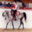
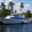
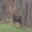
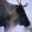

In [45]:
ds, info = tfds.load('cifar10', split='train', with_info=True)

tfds.as_dataframe(ds.take(4), info)

`tfds.show_examples` returns a `matplotlib.figure.Figure` (only image datasets supported now):

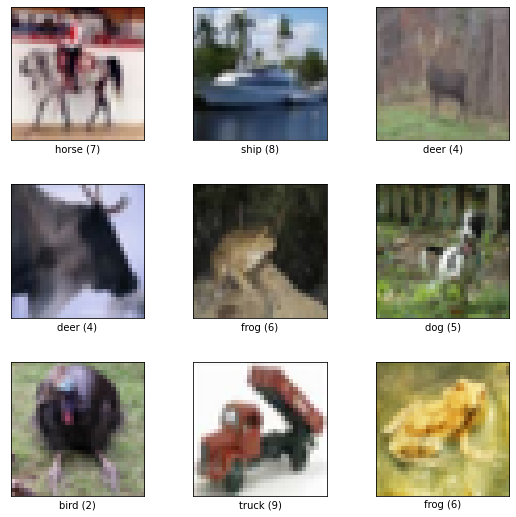

In [46]:
ds, info = tfds.load('cifar10', split='train', with_info=True)

fig = tfds.show_examples(ds, info)

In order to access the dataset, all builders include a `tfds.core.DatasetInfo` object containing the dataset metadata.

It can be accessed through:

*   The `tfds.load` API:


In [47]:
ds, info = tfds.load('cifar10', with_info=True)

*   The `tfds.core.DatasetBuilder` API:

In [48]:
builder = tfds.builder('cifar10')
info = builder.info

The dataset info contains additional informations about the dataset (version, citation, homepage, description,...).

In [49]:
print(info)

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='C:\\Users\\dhan9\\tensorflow_datasets\\cifar10\\3.0.2',
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features 

In order to see metadata (label names, image shape,...) we can access the `tfds.features.FeatureDict`:

In [50]:
info.features

FeaturesDict({
    'id': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

Number of classes, label names:

In [51]:
print(info.features["label"].num_classes)
print(info.features["label"].names)
#print(info.features["label"].int2str(7))  # Human readable version (8 -> 'cat')
#print(info.features["label"].str2int('7'))

10
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Shapes, dtypes:

In [52]:
print(info.features.shape)
print(info.features.dtype)
print(info.features['image'].shape)
print(info.features['image'].dtype)

{'id': (), 'image': (32, 32, 3), 'label': ()}
{'id': tf.string, 'image': tf.uint8, 'label': tf.int64}
(32, 32, 3)
<dtype: 'uint8'>


Access the `tfds.core.SplitDict` for split metadata (e.g. split names, number of examples,...)

In [53]:
print(info.splits)

{'train': <SplitInfo num_examples=50000, num_shards=1>, 'test': <SplitInfo num_examples=10000, num_shards=1>}


Available splits:

In [54]:
print(list(info.splits.keys()))

['train', 'test']


Get info on individual split:

In [55]:
print(info.splits['train'].num_examples)
print(info.splits['train'].filenames)
print(info.splits['train'].num_shards)

50000
['cifar10-train.tfrecord-00000-of-00001']
1


It also works with the subsplit API:

In [56]:
print(info.splits['train[15%:75%]'].num_examples)
print(info.splits['train[15%:75%]'].file_instructions)

30000
[FileInstruction(filename='cifar10-train.tfrecord-00000-of-00001', skip=7500, take=30000, num_examples=30000)]


### 5. Building a Multilayer Perceptron for Classifying Iris Flowers <a name="mlp" />
We finally implement a predictive model in TensorFlow. 

We use **Keras** to build neural networks. In TensorFlow 2.0, the Keras API (`tf.keras`) has become the primary and recommended approach for implementing models. The most commonly used approach for
building an NN in TensorFlow is through `tf.keras.Sequential()`, which allows *stacking layers* to form a network. Alternatively, the layers can be added one by one using the `.add()` method. Models built using the `tf.keras` API can be compiled and trained via the `.compile()` and `.fit()` methods.

Now we see how to solve a classification task using the **Iris flower dataset** and build a two-layer perceptron using the Keras API. First, let's get the data from `tensorflow_datasets`.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

iris, iris_info = tfds.load('iris', with_info=True)

print(iris_info)

tfds.core.DatasetInfo(
    name='iris',
    full_name='iris/2.0.0',
    description="""
    This is perhaps the best known database to be found in the pattern recognition
    literature. Fisher's paper is a classic in the field and is referenced
    frequently to this day. (See Duda & Hart, for example.) The data set contains
    3 classes of 50 instances each, where each class refers to a type of iris
    plant. One class is linearly separable from the other 2; the latter are NOT
    linearly separable from each other.
    """,
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    data_path='C:\\Users\\dhan9\\tensorflow_datasets\\iris\\2.0.0',
    download_size=4.44 KiB,
    dataset_size=7.62 KiB,
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('features', 'label'),
    splits={
        'train': <SplitInfo num_examples=150, num_shards=1>,


We can **split the dataset** into train and test sets. An approach is to load the entire dataset first and then use `.take()` and `.skip()` to split the dataset to two partitions. If the dataset is not shuffled at first, we can also *shuffle* the dataset. However, we need to be very careful with this because it can lead to mixing the train/test examples, which is not acceptable in machine learning. To avoid this, we have to set an argument, `reshuffle_each_iteration=False`, in the `.shuffle()` method.

In [58]:
tf.random.set_seed(1)

ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)

print(next(iter(ds_orig)))

ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.5, 3. , 5.2, 2. ], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=2>}


In [59]:
## checking the number of examples:

n = 0
for example in ds_train_orig:
    n += 1
print(n)


n = 0
for example in ds_test:
    n += 1
print(n)

100
50


We need to apply a transformation via the `.map()` method to convert the dictionary to a tuple.

In [60]:
ds_train_orig = ds_train_orig.map(lambda x: (x['features'], x['label']))
ds_test = ds_test.map(lambda x: (x['features'], x['label']))

next(iter(ds_train_orig))

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.5, 3. , 5.2, 2. ], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>)

Now, we are ready to use the Keras API to build a model efficiently. In particular, using the `tf.keras.Sequential` class, we can stack a few Keras layers and build an MLP. For this problem, we are going to use the *Dense layer* (`tf.keras.layers.Dense`), which is also known as a fully connected (FC) layer or linear layer.

Here, we want to define a model with *two hidden layers*. The first one receives an input of four features and projects them to 16 neurons. The second layer receives the output of the previous layer (which has size 16) and projects them to three output neurons, since we have three class labels. This can be done using the Sequential class and the Dense layer in Keras as follows.

In [61]:
iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='sigmoid', 
                          name='fc1', input_shape=(4,)),
    tf.keras.layers.Dense(3, name='fc2', activation='softmax')])

iris_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                80        
                                                                 
 fc2 (Dense)                 (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


Next, we will compile this model to specify the loss function, the optimizer, and the metrics for evaluation.

In [62]:
iris_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

Now, we can **train the model**. We will specify the number of epochs to be 100 and the batch size to be 2. In the following code, we will build an infinitely repeating dataset, which will be passed to the `fit()` method for training the model. In this case, in order for the `fit()` method to be able to keep track of the epochs, it needs to know the number of steps for each epoch. Given the size of our training data (here, 100) and the batch size (`batch_size`), we can determine the number of steps in each epoch, `steps_per_epoch`.

In [63]:
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size)

ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)


history = iris_model.fit(ds_train, epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch, 
                         verbose=0)

The returned variable history keeps the training loss and the training accuracy (since they were specified as metrics to `iris_model.compile()`) after each epoch. We can use this to visualize the learning curves as follows:

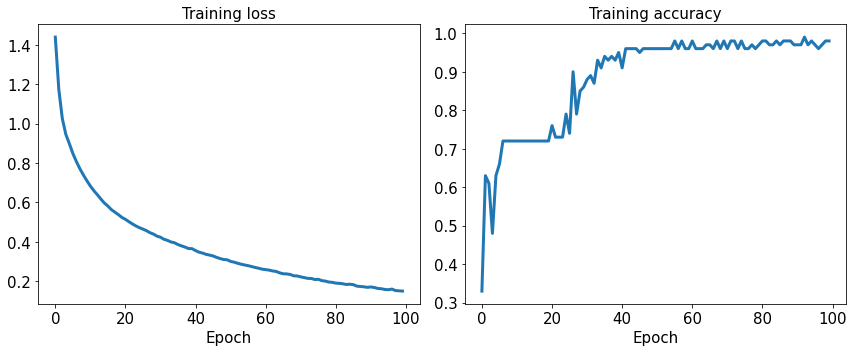

In [64]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
#plt.savefig('ch13-cls-learning-curve.pdf')

plt.show()

Since we specified 'accuracy' as our evaluation metric in `iris_model.compile()`, we can now directly evaluate the model on the test dataset:

In [65]:
results = iris_model.evaluate(ds_test.batch(50), verbose=0)
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*results))

Test loss: 0.1483   Test Acc.: 0.9800


Trained models can be **saved on disk** for future use. This can be done as follows:

In [66]:
iris_model.save('iris-classifier.h5', 
                overwrite=True,
                include_optimizer=True,
                save_format='h5')

The first option is the filename. Calling `iris_model.save()` will save both the model architecture and all the learned parameters. However, if you want to save only the architecture, you can use the `iris_model.to_json()` method, which saves the model configuration in JSON format. Or if you want to save only the model weights, you can do that by calling `iris_model.save_weights()`. The `save_format` can be specified to be either 'h5' for the HDF5 format or 'tf' for TensorFlow format.

Now, let's reload the saved model. We can also verify the model architecture by calling `iris_model_new.summary()`.

In [67]:
iris_model_new = tf.keras.models.load_model('iris-classifier.h5')

iris_model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                80        
                                                                 
 fc2 (Dense)                 (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


Finally, let's evaluate this new model that is reloaded on the test dataset to verify that the results are the same as before:

In [68]:
results = iris_model_new.evaluate(ds_test.batch(50), verbose=0)
print('Test loss: {:.4f}   Test Acc.: {:.4f}'.format(*results))

Test loss: 0.1483   Test Acc.: 0.9800


### 6. Resources on TensorFlow <a name="res"/>

#### tensorflow.org
The main repository of information about TensorFlow is [tensorflow.org](tensorflow.org). There you can find guides, reference documentation, tutorials and more. 
- Latest tutorials: https://tensorflow.org/tutorials
- Detailed guides (think: book chapters): http://tensorflow.org/guide 
- For a curated list of tutorials, see bit.ly/tensorflow-tutorial-catalog

#### keras.io
The high-level APIs in TensorFlow are based on the excellent open-source [Keras](https://keras.io/) library. You can find many tutorials at https://keras.io.

#### Books
Here are a few book recommendations from the TensorFlow developer relations team, two practical, and one academic:
- The first practical book is "[Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)", 2nd Edition, by Aurélien Géron. It's excellent, and begins with machine learning basics in scikit-learn, then progresses into TensorFlow 2.0 for deep learning. It includes a helpful [GitHub repo](https://github.com/ageron/handson-ml2) with many examples for both libraries. Note: you'll want to purchase the 2nd edition (the 1st edition uses TF1, which is out of date).
- The second practical book is "[Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python-second-edition)", Second Edition. This book is outstanding, and contains a clear introduction to deep learning with TensorFlow, and many hands-on examples. The second edition (recommended) is currently being written, and is available now online through the Manning Early Access Program (MEAP).
- The recommended academic book is "[Deep Learning](http://deeplearningbook.org/)" by Ian Goodfellow. This book is freely available online, and contains lots of theoretical background. It's more challenging than the above, and helpful for supplementary reading.

Hands-On Machine Learning uses Python for code examples, but that's not all you can do with TensorFlow. 


#### Online Courses
The TensorFlow developer relations team has partnered with online learning providers, Coursera and Udacity, to offer courses to teach programmers how to use TensorFlow.

*Coursera* offers several specializations for TensorFlow. Each specialization consists of 3-5 courses and is available for a monthly fee. However, people can audit each individual course for free.
- "[TensorFlow in Practice Specialization](https://www.coursera.org/specializations/tensorflow-in-practice)" gets you started using TensorFlow, and covers image classification, text classification, natural language processing and time series predictions.
- "[TensorFlow: Data and Deployment Specialization](https://www.coursera.org/specializations/tensorflow-data-and-deployment)" teaches the use of tensorflow.js to run models in your browser, using tensorflow lite to run models on mobile and IoT devices, and more deployment scenarios using TensorFlow Serving, TensorFlow Hub, and TensorBoard.

*Udacity* offers two courses on TensorFlow; both are available free.
- "[Intro to TensorFlow for deep learning](https://www.udacity.com/course/intro-to-tensorflow-for-deep-learning--ud187)" gets you started using TensorFlow, and covers image classification, text classification, natural language processing and time series predictions.
- "[Introduction to TensorFlow Lite](https://www.udacity.com/course/intro-to-tensorflow-lite--ud190)" teaches how to deploy deep learning models on mobile and embedded devices with TensorFlow Lite.


#### Colab
TensorFlow 2.x is installed in [Colab](https://colab.research.google.com/notebooks/intro.ipynb) by default. Colab includes a free GPU. To activate the GPU, go to Runtime -> Change runtime type -> GPU. 
Colab is highly recommended for students, there are no costs involved. You can also create and store Colab notebooks in [Google Drive](http://drive.google.com/).


#### Applying for Google Cloud Platform credit
If you would like to apply for credits for **Google Cloud Platform** (GCP) see [this link](https://edu.google.com/programs/faculty/). Note however that often you will not need to use GCP credits in your courses, since Colab provides an easy way for students to write and run programs that use TensorFlow running in the cloud.






### 7. References <a name="ref"/>
[1] S. Raschka, V. Mirjalili, "Python Machine Learning", 3rd ed., Packt Publishing, 2019.<br>